

# Caso Práctico 3: Reducción dimensionalidad



## Principal Components Analysis (PCA)

Como hemos visto en esta unidad, **Principal Components Analysis** (PCA) es uno de los métodos más comunes para reducción de dimensionalidad.  Esta técnica reduce la dimensión del conjunto de datos, formado generalmente por variables correladas entre sí, manteniendo la máxima variabilidad posible de los datos. PCA crea un nuevo conjunto de variables, llamadas componentes principales (PCs), a partir de combinaciones lineales de los datos originales. 

En el siguiente caso práctico utilizaremos el dataset `Iris` para obtener una nueva representación de los datos es un espacio de menor dimensión del original.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import numpy as np

from sklearn.decomposition import PCA

#Cargar el dataset
iris = datasets.load_iris()



El dataset contiene datos sobre tres plantas de iris (iris setosa, iris versicolour, e iris virginica), descritas mediante cuatro atributos:

1. Longitud del sépalo (cm)
2. Ancho del sépalo (cm)
3. Longitud del pétalo (cm)
4. Ancho del pétalos (cm)



Asignamos los datos y las etiquetas a variables diferentes.

In [98]:
features = iris.data
label = iris.target
print (features.shape)

(150, 4)


Si no estas familiarizado con este dataset realiza un análisis exploratorio de los datos.
Plotea las variables dos a dos, coloreando cada punto según la clase de planta para ver cómo se diferencian.



## Aplicación

Utilizamos el módulo `PCA` de Scikit-learn contiene los métodos necesarios para obtener los componentes principales de un conjunto de datos y transformarlos al nuevo espacio de representación.



Utilizando el datset iris vamos extraer las tres componentes principales y luego transformar el dataset al nuevo espacio de respresentación de los atributos.
Se proporciona el código.





El proceso se puede descomponer en tres etapas 
1. Crear el objeto PCA
2. Extraemos los componentes principales 
3. Transformamos los datos

In [ ]:
pca3 = PCA(n_components=3)
pca3.fit(features)
features_reduced_3 = pca3.transform(features)

print(features_reduced_3.shape)

(150, 3)


 A continuación utiliza el siguiente código para generar un gráfico con los datos transformados.

In [100]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(features_reduced_3[:, 0], features_reduced_3[:, 1], features_reduced_3[:, 2], c=label)
ax.set_title("First three principal components")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
plt.show()

<Figure size 800x600 with 0 Axes>


El atributo `n_components` indica el número de componentes principales que queremos utilizar para reducir la dimensionalidad del dataset. Reduce a dos dimensiones el conjunto de datos y grafica los datos en estas nos nuevas dimensiones.



Para reducir a dos dimensiones simplemente tenemos que modificar el atributo `n_components = 2`

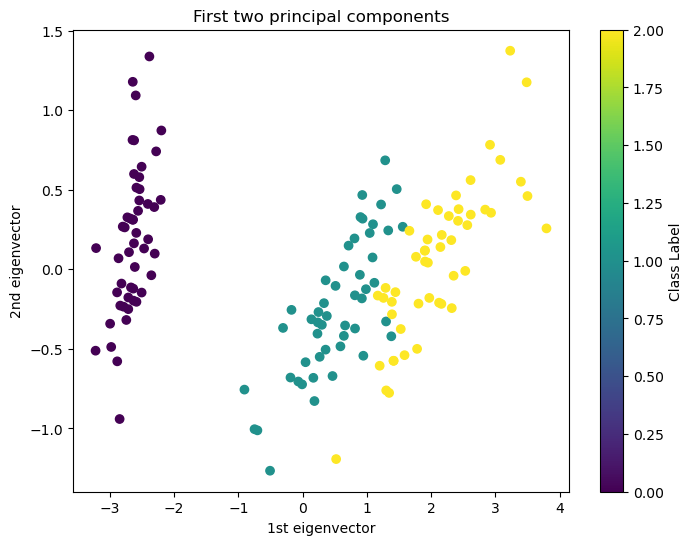

In [101]:
# Reducir a dos dimensiones
pca2 = PCA(n_components=2)
pca2.fit(features)
features_reduced_2 = pca2.transform(features)

# Trazar los datos reducidos
plt.figure(figsize=(8, 6))
plt.scatter(features_reduced_2[:, 0], features_reduced_2[:, 1], c=label, cmap='viridis')
plt.title("First two principal components")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.colorbar(label="Class Label")
plt.show()



#### ¿Cómo elegir el número de componentes principales?

Para elegir k, hay que tener en cuenta dos conceptos:

- **Error de proyección medio cuadrático**, es decir, la diferencia entre los datos originales  y los datos reconstruidos a partir del nuevo espacio de características.

\begin{equation}
\frac{1}{m}\sum_{i=1}^{m}{\mid{x^{(i)} - x_{approx}^{i}\mid}^2}
\end{equation}

- **Variación total de los datos,** se considera un buen número k, al mínimo valor que hace que se cumpla:

\begin{equation}
\frac{\frac{1}{m}\sum_{i=1}^{m}{\mid{x^{(i)} - x_{approx}^{i}\mid}^2}}{\frac{1}{m}\sum_{i=1}^{m}
{\mid{x^{(i)}\mid}^2}} \leq 0.01
\end{equation}
Dicho de otra forma, se considera un buen número de componentes principales al valor más pequeño de k que  hace que el 99% de la varianza se retenga.



En Scikit-learn podemos obtener el pocentaje de varianza explicada por cada componente principal con el atributo:

```python
PCA.explained_variance_ratio_
```

Vamos a tomar un PCA con todos los componentes posibles, es decir, tantos como variables tenga el dataset inicial

Número óptimo de componentes que retienen el 99% de la varianza: 3


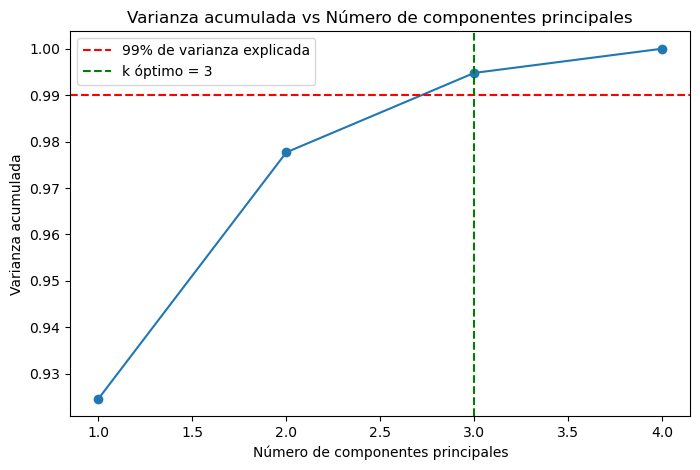

In [ ]:
# Crear un PCA
pca = PCA(n_components=features.shape[1])
pca.fit(features)

# Calcular la varianza acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Encontrar el número mínimo de componentes que retienen al menos el 99% de la varianza
k_optimo = np.argmax(varianza_acumulada >= 0.99) + 1

print(f"Número óptimo de componentes que retienen el 99% de la varianza: {k_optimo}")

# Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
plt.axhline(y=0.99, color='r', linestyle='--', label="99% de varianza explicada")
plt.axvline(x=k_optimo, color='g', linestyle='--', label=f"k óptimo = {k_optimo}")
plt.title('Varianza acumulada vs Número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada')
plt.legend()
plt.show()


Aplica el método `explained_variance_ratio_`

In [ ]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Una vez obtenido utiliza el siguiente código para graficar la varianza explicada por cada componente y la acumulada y explica el resultado. ¿Qué mínimo de componentes principales necesitamos?

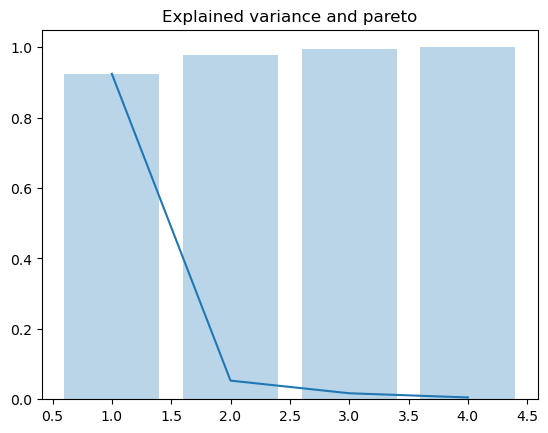

In [104]:
plt.plot(range(1,5),pca.explained_variance_ratio_)
plt.bar(range(1,5),np.cumsum(pca.explained_variance_ratio_), alpha=.3)
plt.title("Explained variance and pareto")
plt.show()

## t-Distributed Stochastic Neighbor Embedding (t-SNE) 

A continuación vamos a realizar una reducción de dimensionalidad con otro método visto en teoría: t-SNE. Recordemos que este método, es una técnica de reducción de dimensionalidad  no supervisada y no lineal basada en la distribución de probabilidad de t-Student.

En este apartado trabajaremos con el conjunto de datos MINIST que cargaremos directamente de scikit-learn. El conjunto de datos MNIST es uno de los conjuntos de datos más populares y ampliamente utilizados en el campo del aprendizaje automático y la visión por computadora. MNIST (Modified National Institute of Standards and Technology) consiste en un conjunto de imágenes en escala de grises de dígitos escritos a mano, del 0 al 9, recopilados de documentos variados de empleados de la Oficina del Censo de los Estados Unidos y estudiantes de secundaria. 

#### MINST data

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd

# Cargar el conjunto de datos MNIST
digits = load_digits()

# Acceder a los datos y las etiquetas
X = digits.data
y = digits.target

print(X.shape, y.shape)

(1797, 64) (1797,)


Transformamos la matriz de datos a un dataframe. Símplemente ejecuta el código que se proporciona a continuación.

In [106]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))
df.head()

Size of the dataframe: (1797, 66)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,y,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,4


#### PCA

En primer lugar realiza una reducción de dimensionalidad utilizando PCA sobre el conjunto de datos MINST. Estandariza primeramente los datos y haz una reducción a dos componentes. Dibuja un scatter plot que represente esta reducción sobre los dos componentes principales. Pinta cada punto en función del número que representa, es decir, la variable y o label en el caso del dataframe. ¿Qué análisis puedes hacer a través del gráfico? ¿Es útil esta técnica para la reducción de dimensionalidad?

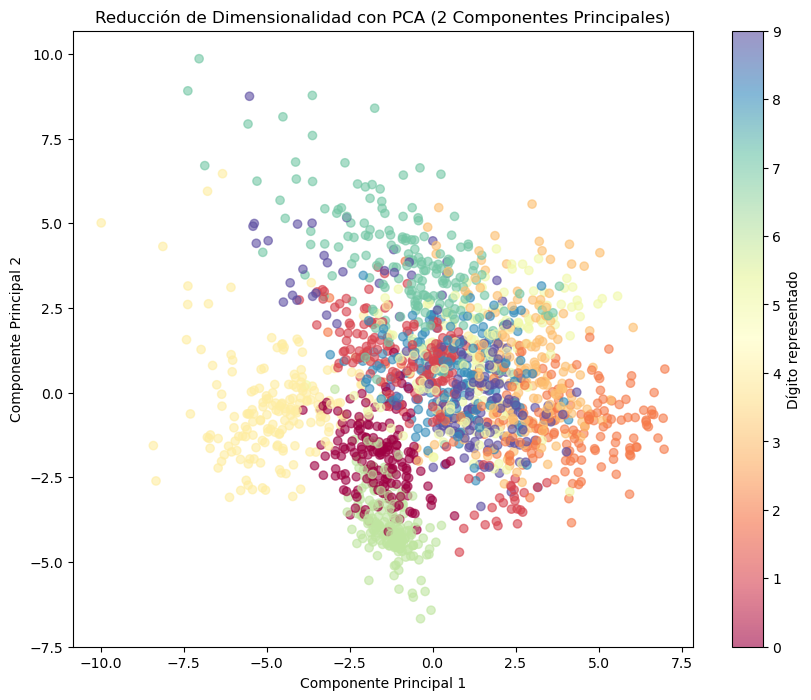

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['y', 'label'], axis=1))

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Añadir los componentes principales al dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Crear el scatter plot de los dos componentes principales
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['y'], cmap='Spectral', alpha=0.6)
plt.colorbar(scatter, label="Dígito representado")
plt.title('Reducción de Dimensionalidad con PCA (2 Componentes Principales)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


#### t-SNE

Ahora realiza una reducción de dimensionalidad utilizando t-SNE sobre el conjunto de datos MINST. Haz una reducción a dos componentes y fija una semilla en 0. 
Dibuja un scatter plot que represente esta reducción sobre los dos dimensiones. Pinta cada punto en función del número que representa, es decir, la variable y o label en el caso del dataframe. 

Ten en cuenta que t-SNE es computacionalmente más costoso. Si el tiempo de cómputo se elevase mucho escoge una muestra representativa del conjunto de los datos.

¿Qué análisis puedes hacer a través del gráfico? ¿Es útil esta técnica para la reducción de dimensionalidad?

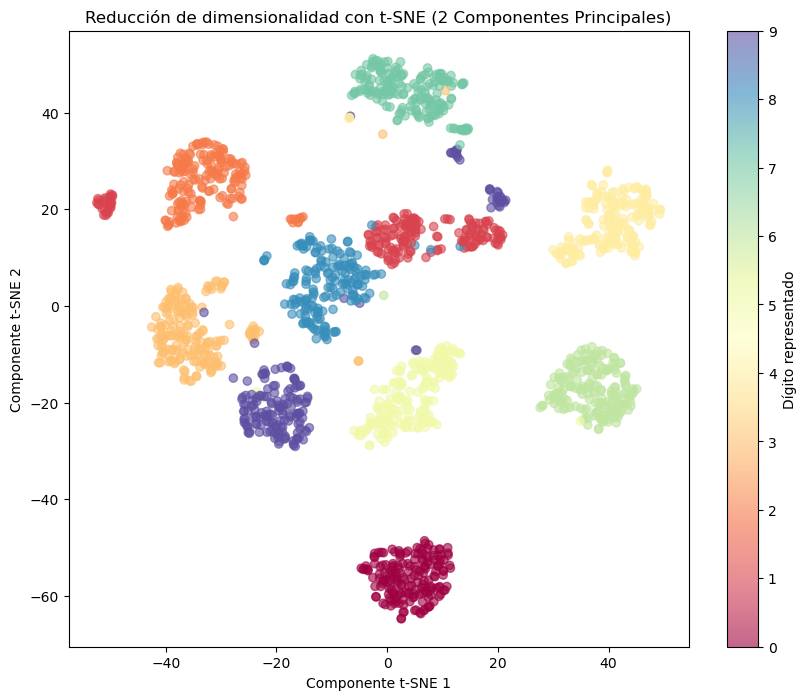

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(df.drop(['y', 'label'], axis=1))

# Añadir las nuevas componentes al dataframe
df['TSNE1'] = tsne_res[:, 0]
df['TSNE2'] = tsne_res[:, 1]

# Crear el scatter plot con las dos componentes de t-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['TSNE1'], df['TSNE2'], c=df['y'], cmap='Spectral', alpha=0.6)
plt.colorbar(scatter, label="Dígito representado")
plt.title('Reducción de dimensionalidad con t-SNE (2 Componentes Principales)')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.show()

#### PCA & t-SNE

A continuación combina ambas técnicas. Realiza una reducción de dimensionalidad utilizando PCA con 10 componentes y posteriormente aplica t-SNE sobre el conjunto de datos resultante. Para t-SNE de nuevo haz una reducción a dos componentes y fija una semilla en 0. 

Dibuja un scatter plot que represente esta reducción sobre los dos dimensiones. Pinta cada punto en función del número que representa, es decir, la variable y o label en el caso del dataframe. 

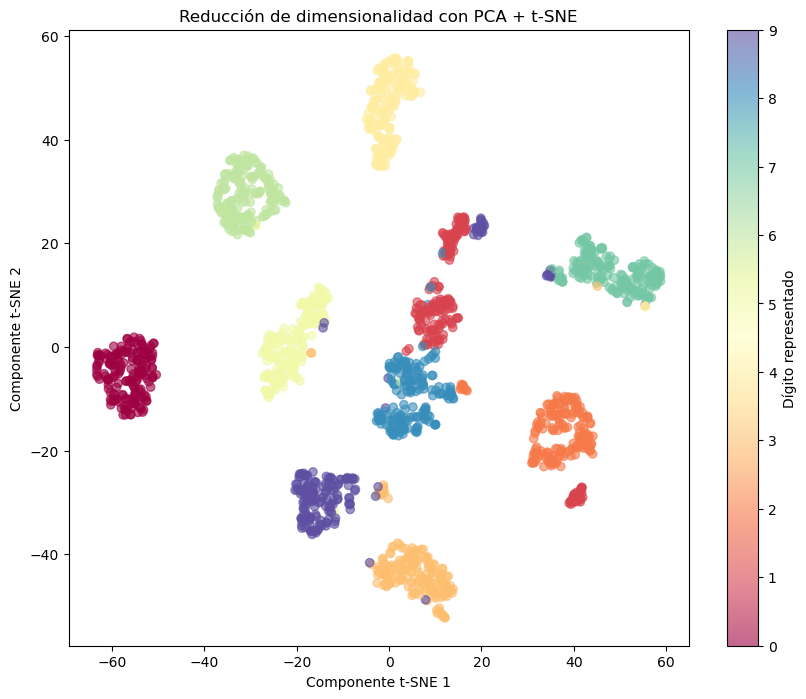

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reducir a 10 componentes usando PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(df.drop(['y', 'label'], axis=1))

# Aplicar t-SNE sobre el resultado de PCA para reducirlo a 2 dimensiones
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_pca)

# Añadir las nuevas componentes al dataframe
df['TSNE1'] = X_tsne[:, 0]
df['TSNE2'] = X_tsne[:, 1]

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['TSNE1'], df['TSNE2'], c=df['y'], cmap='Spectral', alpha=0.6)
plt.colorbar(scatter, label="Dígito representado")
plt.title('Reducción de dimensionalidad con PCA + t-SNE')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.show()
